In [ ]:
import numpy as np
import pandas as pd
import sciann as sn
import matplotlib.pyplot as plt
import scipy.io

---------------------- SCIANN 0.7.0.1 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://www.sciencedirect.com/science/article/pii/S0045782520307374", 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 

 Need support or would like to contribute, please join sciann`s slack group: 
 +  "https://join.slack.com/t/sciann/shared_invite/zt-ne1f5jlx-k_dY8RGo3ZreDXwz0f~CeA" 
 
TensorFlow Version: 2.6.2 
Python Version: 3.6.8 (tags/v3.6.8:3c6b436a57, Dec 24 2018, 00:16:47) [MSC v.1916 64 bit (AMD64)] 



In [ ]:
def PrepareData(num_data=5000, random=True):

    # Get data file from:
    #         https://github.com/maziarraissi/PINNs/tree/master/main/Data/cylinder_nektar_wake.mat
    data = scipy.io.loadmat('cylinder_nektar_wake.mat')

    U_star = data['U_star'] # N x 2 x T
    P_star = data['p_star'] # N x T
    t_star = data['t'] # T x 1
    X_star = data['X_star'] # N x 2

    N = X_star.shape[0]
    T = t_star.shape[0]

    # Rearrange Data
    XX = np.tile(X_star[:,0:1], (1,T)) # N x T
    YY = np.tile(X_star[:,1:2], (1,T)) # N x T
    TT = np.tile(t_star, (1,N)).T # N x T

    #x-velocity
    UU = U_star[:,0,:] # N x T
     #y-velocity
    VV = U_star[:,1,:] # N x T
    PP = P_star # N x T

    # Pick random data.
    if random:
        idx = np.random.choice(N*T, num_data, replace=False)
    else:
        idx = np.arange(0, N*T)

    x = XX.flatten()[idx,None] # NT x 1
    y = YY.flatten()[idx,None] # NT x 1
    t = TT.flatten()[idx,None] # NT x 1

    u = UU.flatten()[idx,None] # NT x 1
    v = VV.flatten()[idx,None] # NT x 1
    p = PP.flatten()[idx,None] # NT x 1

    return (x,y,t,u,v,p)

In [ ]:
# # Replace 'your_variable_name' with the actual variable name from the MATLAB file
# variable_name = 'p_star'
# if variable_name in mat_data:
#     variable_value = mat_data[variable_name]
#     print(variable_value)
# else:
#     print(f"Variable '{variable_name}' not found in the MATLAB file.")

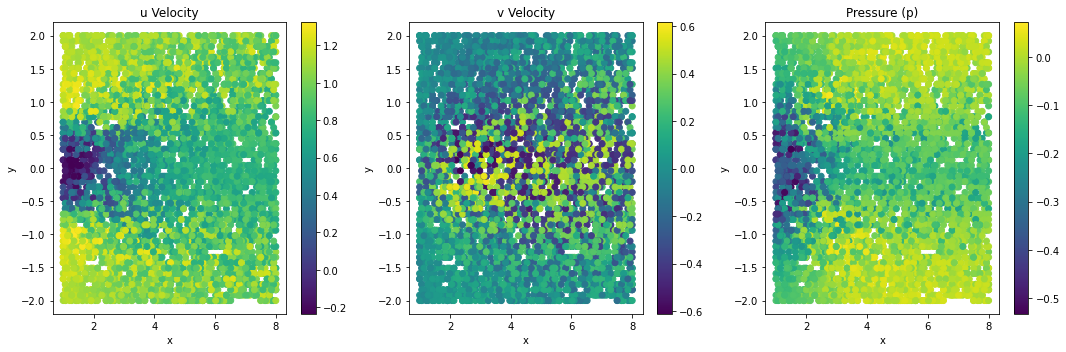

In [ ]:


# Define your PrepareData function here (including the missing imports)

# Load and prepare the data
x, y, t, u, v, p = PrepareData()

# Create scatter plots for u, v, and p
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for u
scatter_u = axs[0].scatter(x, y, c=u, cmap='viridis')
fig.colorbar(scatter_u, ax=axs[0], orientation='vertical')
axs[0].set_title('u Velocity')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Scatter plot for v
scatter_v = axs[1].scatter(x, y, c=v, cmap='viridis')
fig.colorbar(scatter_v, ax=axs[1], orientation='vertical')
axs[1].set_title('v Velocity')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Scatter plot for p
scatter_p = axs[2].scatter(x, y, c=p, cmap='viridis')
fig.colorbar(scatter_p, ax=axs[2], orientation='vertical')
axs[2].set_title('Pressure (p)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()


In [ ]:
# # Convert MATLAB data to a Pandas DataFrame
# # Replace 'U_star' with the specific variable name you want to convert
# variable_name = 'p_star'
# if variable_name in mat_data:
#     data = mat_data[variable_name]
#     df = pd.DataFrame(data)
#     print(df.head())
# else:
#     print(f"Variable '{variable_name}' not found in the MATLAB file.")


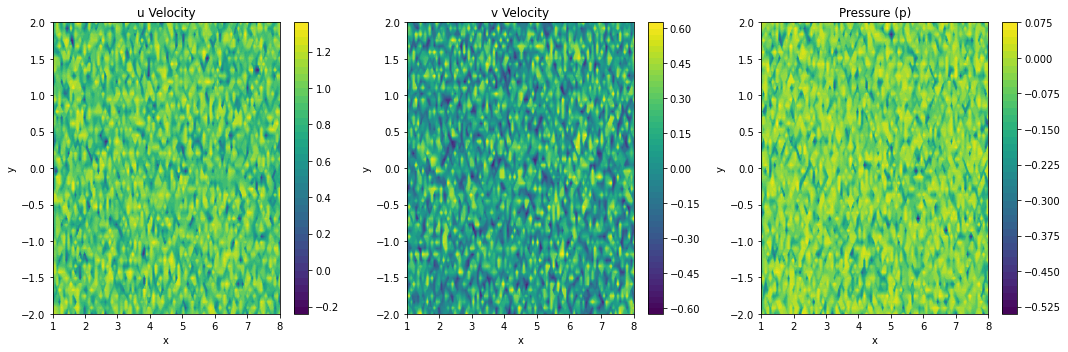

In [ ]:
# Define your PrepareData function here (including the missing imports)

# Load and prepare the data
x, y, t, u, v, p = PrepareData()

# Get unique x and y values
unique_x = np.unique(x)
unique_y = np.unique(y)

# Reshape data for contour plots
u_plot = u.reshape(len(unique_x), len(unique_y)).T
v_plot = v.reshape(len(unique_x), len(unique_y)).T
p_plot = p.reshape(len(unique_x), len(unique_y)).T

# Create contour plots for u, v, and p
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Contour plot for u
contour_u = axs[0].contourf(unique_x, unique_y, u_plot, levels=50, cmap='viridis')
fig.colorbar(contour_u, ax=axs[0], orientation='vertical')
axs[0].set_title('u Velocity')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Contour plot for v
contour_v = axs[1].contourf(unique_x, unique_y, v_plot, levels=50, cmap='viridis')
fig.colorbar(contour_v, ax=axs[1], orientation='vertical')
axs[1].set_title('v Velocity')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# Contour plot for p
contour_p = axs[2].contourf(unique_x, unique_y, p_plot, levels=50, cmap='viridis')
fig.colorbar(contour_p, ax=axs[2], orientation='vertical')
axs[2].set_title('Pressure (p)')
axs[2].set_xlabel('x')
axs[2].set_ylabel('y')

plt.tight_layout()
plt.show()


In [ ]:
# # Calculate the mean along the first dimension (axis 0)
# reduced_data = np.mean(data, axis=0)

# # Print the shape of the reduced data
# print(reduced_data)

In [ ]:
# # Replace 'U_star' with the specific variable name you want to convert
# variable_name = 'U_star'
# if variable_name in mat_data:
#     data = mat_data[variable_name]

#     # Reshape the data into a 2D array (5000 rows x 400 columns)
#     flattened_data = data.reshape(data.shape[0], -1)

#     # Create a DataFrame
#     df = pd.DataFrame(flattened_data)

#     print(df.head())
# else:
#     print(f"Variable '{variable_name}' not found in the MATLAB file.")



In [ ]:
# # Get the value of the 'U_star' variable from the loaded MATLAB data
# U_star = mat_data['U_star']

# # Print the first few rows (default is 5 rows)
# print(U_star[:5, :])

In [ ]:
# #Call the PrepareData function
# x, y, t, u, v, p = PrepareData(num_data=1000, random=True)

# #Print the U_star variable
# #print("U_star:")
# print(u)

In [ ]:
x_train, y_train, t_train, u_train, v_train, p_train = PrepareData(5000, random=True)

# PINN step

In [ ]:
x = sn.Variable("x", dtype='float64')
y = sn.Variable("y", dtype='float64')
t = sn.Variable("t", dtype='float64')

In [ ]:
P = sn.Functional("P", [x, y, t], 8*[20], 'tanh')
Psi = sn.Functional("Psi", [x, y, t], 8*[20], 'tanh')

In [ ]:
lambda1 = sn.Parameter(np.random.rand(), inputs=[x,y,t], name="lambda1")
lambda2 = sn.Parameter(np.random.rand(), inputs=[x,y,t], name="lambda2")

In [ ]:
u = sn.diff(Psi, y)
v = -sn.diff(Psi, x)

u_t = sn.diff(u, t)
u_x = sn.diff(u, x)
u_y = sn.diff(u, y)
u_xx = sn.diff(u, x, order=2)
u_yy = sn.diff(u, y, order=2)

v_t = sn.diff(v, t)
v_x = sn.diff(v, x)
v_y = sn.diff(v, y)
v_xx = sn.diff(v, x, order=2)
v_yy = sn.diff(v, y, order=2)

p_x = sn.diff(P, x)
p_y = sn.diff(P, y)

In [ ]:
# Define constraints
d1 = sn.Data(u)
d2 = sn.Data(v)
d3 = sn.Data(P)

c1 = sn.Tie(-p_x, u_t+lambda1*(u*u_x+v*u_y)-lambda2*(u_xx+u_yy))
c2 = sn.Tie(-p_y, v_t+lambda1*(u*v_x+v*v_y)-lambda2*(v_xx+v_yy))
c3 = sn.Data(u_x + v_y)

In [ ]:
c4 = Psi*0.0

In [ ]:
# Define the optimization model (set of inputs and constraints)
model = sn.SciModel(
    inputs=[x, y, t],
    targets=[d1, d2, d3, c1, c2, c3, c4],
    loss_func="mse")

In [ ]:
input_data = [x_train, y_train, t_train]

In [ ]:
data_d1 = u_train
data_d2 = v_train
data_d3 = p_train
data_c1 = 'zeros'
data_c2 = 'zeros'
data_c3 = 'zeros'
data_c4 = 'zeros'
target_data = [data_d1, data_d2, data_d3, data_c1, data_c2, data_c3, data_c4]

In [ ]:
history = model.train(x_true=input_data, y_true=target_data, epochs=500, batch_size=100, shuffle=True,learning_rate=0.001,
    reduce_lr_after=100, stop_loss_value=1e-8, verbose=1)


Total samples: 5000 
Batch size: 100 
Total batches: 50 

Epoch 1/500
50/50 [==============================] - 27s 18ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.7511 - Grad__loss: 0.5952 - mul_loss: 0.0756 - P_loss: 0.0142 - sub_2_loss: 0.0529 - sub_4_loss: 0.0132 - add_7_loss: 2.3330e-34 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 26.5468
Epoch 2/500
50/50 [==============================] - 1s 15ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.5616 - Grad__loss: 0.3978 - mul_loss: 0.0785 - P_loss: 0.0104 - sub_2_loss: 0.0652 - sub_4_loss: 0.0097 - add_7_loss: 7.2405e-34 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.7429
Epoch 3/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.4315 - Grad__loss: 0.2805 - mul_loss: 0.0835 - P_loss: 0.0106 - sub_2_loss: 0.0438 - sub_4_loss: 0.0132 - add_7_loss: 1.2405e-33 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8317
Epoch 4/500
50/50 [==============================] - 1s 16ms

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0918 - Grad__loss: 0.0282 - mul_loss: 0.0525 - P_loss: 0.0048 - sub_2_loss: 0.0031 - sub_4_loss: 0.0032 - add_7_loss: 4.8362e-33 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8573
Epoch 29/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0887 - Grad__loss: 0.0266 - mul_loss: 0.0516 - P_loss: 0.0048 - sub_2_loss: 0.0027 - sub_4_loss: 0.0031 - add_7_loss: 4.7118e-33 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8965
Epoch 30/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0851 - Grad__loss: 0.0245 - mul_loss: 0.0503 - P_loss: 0.0051 - sub_2_loss: 0.0024 - sub_4_loss: 0.0028 - add_7_loss: 4.9890e-33 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8501
Epoch 31/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0831 - Grad__loss: 0

Epoch 56/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0608 - Grad__loss: 0.0164 - mul_loss: 0.0366 - P_loss: 0.0039 - sub_2_loss: 0.0018 - sub_4_loss: 0.0021 - add_7_loss: 1.2017e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8590
Epoch 57/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0604 - Grad__loss: 0.0164 - mul_loss: 0.0360 - P_loss: 0.0039 - sub_2_loss: 0.0018 - sub_4_loss: 0.0022 - add_7_loss: 1.1950e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8913
Epoch 58/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0598 - Grad__loss: 0.0163 - mul_loss: 0.0356 - P_loss: 0.0040 - sub_2_loss: 0.0018 - sub_4_loss: 0.0022 - add_7_loss: 1.2480e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8503
Epoch 59/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0589 - 

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0531 - Grad__loss: 0.0153 - mul_loss: 0.0303 - P_loss: 0.0037 - sub_2_loss: 0.0017 - sub_4_loss: 0.0020 - add_7_loss: 1.5306e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8590
Epoch 83/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0517 - Grad__loss: 0.0143 - mul_loss: 0.0302 - P_loss: 0.0036 - sub_2_loss: 0.0017 - sub_4_loss: 0.0020 - add_7_loss: 1.5293e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8549
Epoch 84/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0520 - Grad__loss: 0.0146 - mul_loss: 0.0299 - P_loss: 0.0037 - sub_2_loss: 0.0017 - sub_4_loss: 0.0020 - add_7_loss: 1.5461e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8599
Epoch 85/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0514 - Grad__loss: 0

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0482 - Grad__loss: 0.0140 - mul_loss: 0.0272 - P_loss: 0.0034 - sub_2_loss: 0.0017 - sub_4_loss: 0.0019 - add_7_loss: 1.8054e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8580
Epoch 110/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0474 - Grad__loss: 0.0135 - mul_loss: 0.0270 - P_loss: 0.0033 - sub_2_loss: 0.0017 - sub_4_loss: 0.0019 - add_7_loss: 1.8216e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8613
Epoch 111/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0471 - Grad__loss: 0.0135 - mul_loss: 0.0268 - P_loss: 0.0033 - sub_2_loss: 0.0017 - sub_4_loss: 0.0019 - add_7_loss: 1.8839e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8681
Epoch 112/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0477 - Grad__loss

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0414 - Grad__loss: 0.0124 - mul_loss: 0.0217 - P_loss: 0.0029 - sub_2_loss: 0.0022 - sub_4_loss: 0.0023 - add_7_loss: 2.2717e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8592
Epoch 137/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0402 - Grad__loss: 0.0122 - mul_loss: 0.0207 - P_loss: 0.0028 - sub_2_loss: 0.0021 - sub_4_loss: 0.0023 - add_7_loss: 2.2756e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8669
Epoch 138/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0389 - Grad__loss: 0.0114 - mul_loss: 0.0202 - P_loss: 0.0029 - sub_2_loss: 0.0022 - sub_4_loss: 0.0023 - add_7_loss: 2.4039e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8476
Epoch 139/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0379 - Grad__loss

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0298 - Grad__loss: 0.0091 - mul_loss: 0.0141 - P_loss: 0.0025 - sub_2_loss: 0.0022 - sub_4_loss: 0.0020 - add_7_loss: 3.2692e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8352
Epoch 164/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0288 - Grad__loss: 0.0085 - mul_loss: 0.0138 - P_loss: 0.0024 - sub_2_loss: 0.0022 - sub_4_loss: 0.0020 - add_7_loss: 3.4815e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8300
Epoch 165/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0284 - Grad__loss: 0.0085 - mul_loss: 0.0132 - P_loss: 0.0025 - sub_2_loss: 0.0021 - sub_4_loss: 0.0020 - add_7_loss: 3.4921e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8439
Epoch 166/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0275 - Grad__loss

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0197 - Grad__loss: 0.0058 - mul_loss: 0.0083 - P_loss: 0.0020 - sub_2_loss: 0.0020 - sub_4_loss: 0.0017 - add_7_loss: 5.9721e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8443
Epoch 191/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0199 - Grad__loss: 0.0059 - mul_loss: 0.0082 - P_loss: 0.0019 - sub_2_loss: 0.0021 - sub_4_loss: 0.0018 - add_7_loss: 6.1129e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8429
Epoch 192/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0222 - Grad__loss: 0.0069 - mul_loss: 0.0093 - P_loss: 0.0020 - sub_2_loss: 0.0022 - sub_4_loss: 0.0019 - add_7_loss: 5.7711e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8364
Epoch 193/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0202 - Grad__loss

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0144 - Grad__loss: 0.0039 - mul_loss: 0.0056 - P_loss: 0.0014 - sub_2_loss: 0.0019 - sub_4_loss: 0.0016 - add_7_loss: 7.0511e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8575
Epoch 218/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0174 - Grad__loss: 0.0052 - mul_loss: 0.0070 - P_loss: 0.0015 - sub_2_loss: 0.0020 - sub_4_loss: 0.0017 - add_7_loss: 6.7844e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8611
Epoch 219/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0151 - Grad__loss: 0.0044 - mul_loss: 0.0057 - P_loss: 0.0015 - sub_2_loss: 0.0018 - sub_4_loss: 0.0016 - add_7_loss: 6.6950e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8688
Epoch 220/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0149 - Grad__loss

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0120 - Grad__loss: 0.0031 - mul_loss: 0.0043 - P_loss: 0.0013 - sub_2_loss: 0.0018 - sub_4_loss: 0.0016 - add_7_loss: 7.1942e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8720
Epoch 245/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0125 - Grad__loss: 0.0034 - mul_loss: 0.0047 - P_loss: 0.0012 - sub_2_loss: 0.0018 - sub_4_loss: 0.0015 - add_7_loss: 8.0606e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8486
Epoch 246/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0117 - Grad__loss: 0.0031 - mul_loss: 0.0043 - P_loss: 0.0012 - sub_2_loss: 0.0016 - sub_4_loss: 0.0015 - add_7_loss: 6.7694e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8503
Epoch 247/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0120 - Grad__loss

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0096 - Grad__loss: 0.0026 - mul_loss: 0.0034 - P_loss: 9.3992e-04 - sub_2_loss: 0.0015 - sub_4_loss: 0.0012 - add_7_loss: 7.1748e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8627
Epoch 272/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0126 - Grad__loss: 0.0035 - mul_loss: 0.0048 - P_loss: 9.6142e-04 - sub_2_loss: 0.0018 - sub_4_loss: 0.0015 - add_7_loss: 7.1323e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8557
Epoch 273/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0103 - Grad__loss: 0.0027 - mul_loss: 0.0037 - P_loss: 9.8059e-04 - sub_2_loss: 0.0016 - sub_4_loss: 0.0013 - add_7_loss: 6.7470e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8542
Epoch 274/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0095 

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0110 - Grad__loss: 0.0032 - mul_loss: 0.0039 - P_loss: 9.0056e-04 - sub_2_loss: 0.0017 - sub_4_loss: 0.0014 - add_7_loss: 6.4204e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8391
Epoch 299/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0134 - Grad__loss: 0.0040 - mul_loss: 0.0051 - P_loss: 9.8785e-04 - sub_2_loss: 0.0019 - sub_4_loss: 0.0014 - add_7_loss: 5.9454e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8392
Epoch 300/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0089 - Grad__loss: 0.0025 - mul_loss: 0.0031 - P_loss: 8.0542e-04 - sub_2_loss: 0.0014 - sub_4_loss: 0.0011 - add_7_loss: 6.3363e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8535
Epoch 301/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0118 

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0077 - Grad__loss: 0.0020 - mul_loss: 0.0025 - P_loss: 7.1551e-04 - sub_2_loss: 0.0014 - sub_4_loss: 0.0010 - add_7_loss: 7.0209e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8618
Epoch 326/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0087 - Grad__loss: 0.0024 - mul_loss: 0.0030 - P_loss: 7.6623e-04 - sub_2_loss: 0.0015 - sub_4_loss: 0.0011 - add_7_loss: 6.6631e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8592
Epoch 327/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0084 - Grad__loss: 0.0022 - mul_loss: 0.0028 - P_loss: 7.6528e-04 - sub_2_loss: 0.0015 - sub_4_loss: 0.0012 - add_7_loss: 6.2630e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8114
Epoch 328/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0078 

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0071 - Grad__loss: 0.0019 - mul_loss: 0.0023 - P_loss: 7.2297e-04 - sub_2_loss: 0.0013 - sub_4_loss: 9.2318e-04 - add_7_loss: 6.0229e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8558
Epoch 353/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0077 - Grad__loss: 0.0020 - mul_loss: 0.0025 - P_loss: 7.0149e-04 - sub_2_loss: 0.0015 - sub_4_loss: 0.0010 - add_7_loss: 5.9784e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8512
Epoch 354/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0072 - Grad__loss: 0.0019 - mul_loss: 0.0022 - P_loss: 6.9440e-04 - sub_2_loss: 0.0013 - sub_4_loss: 0.0010 - add_7_loss: 6.3339e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8462
Epoch 355/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0070 - Grad__loss: 0.0020 - mul_loss: 0.0020 - P_loss: 7.4474e-04 - sub_2_loss: 0.0013 - sub_4_loss: 9.4839e-04 - add_7_loss: 5.8540e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8686
Epoch 379/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0066 - Grad__loss: 0.0017 - mul_loss: 0.0020 - P_loss: 6.4635e-04 - sub_2_loss: 0.0013 - sub_4_loss: 9.5505e-04 - add_7_loss: 6.3423e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8477
Epoch 380/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0068 - Grad__loss: 0.0018 - mul_loss: 0.0020 - P_loss: 6.5919e-04 - sub_2_loss: 0.0014 - sub_4_loss: 9.4240e-04 - add_7_loss: 6.0591e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8849
Epoch 381/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - l

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0066 - Grad__loss: 0.0018 - mul_loss: 0.0020 - P_loss: 5.4945e-04 - sub_2_loss: 0.0013 - sub_4_loss: 9.5164e-04 - add_7_loss: 5.6231e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8361
Epoch 406/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0084 - Grad__loss: 0.0024 - mul_loss: 0.0027 - P_loss: 5.8741e-04 - sub_2_loss: 0.0016 - sub_4_loss: 0.0011 - add_7_loss: 6.1226e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8273
Epoch 407/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0128 - Grad__loss: 0.0040 - mul_loss: 0.0047 - P_loss: 8.1155e-04 - sub_2_loss: 0.0018 - sub_4_loss: 0.0015 - add_7_loss: 4.5947e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8699
Epoch 408/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0054 - Grad__loss: 0.0014 - mul_loss: 0.0016 - P_loss: 4.7384e-04 - sub_2_loss: 0.0011 - sub_4_loss: 7.8818e-04 - add_7_loss: 5.4055e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8813
Epoch 433/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0057 - Grad__loss: 0.0014 - mul_loss: 0.0016 - P_loss: 5.6677e-04 - sub_2_loss: 0.0012 - sub_4_loss: 8.8098e-04 - add_7_loss: 5.0417e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8667
Epoch 434/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0067 - Grad__loss: 0.0018 - mul_loss: 0.0022 - P_loss: 5.0348e-04 - sub_2_loss: 0.0013 - sub_4_loss: 8.8183e-04 - add_7_loss: 5.1788e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8480
Epoch 435/500
50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - l

50/50 [==============================] - 1s 17ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0049 - Grad__loss: 0.0013 - mul_loss: 0.0014 - P_loss: 3.9856e-04 - sub_2_loss: 0.0011 - sub_4_loss: 7.6677e-04 - add_7_loss: 5.0509e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8698
Epoch 460/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0047 - Grad__loss: 0.0013 - mul_loss: 0.0012 - P_loss: 3.8526e-04 - sub_2_loss: 9.8920e-04 - sub_4_loss: 7.1172e-04 - add_7_loss: 4.8823e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8432
Epoch 461/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0058 - Grad__loss: 0.0016 - mul_loss: 0.0016 - P_loss: 5.0610e-04 - sub_2_loss: 0.0013 - sub_4_loss: 9.1315e-04 - add_7_loss: 5.1733e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8417
Epoch 462/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000

50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0041 - Grad__loss: 0.0011 - mul_loss: 0.0011 - P_loss: 3.2532e-04 - sub_2_loss: 9.2269e-04 - sub_4_loss: 6.7360e-04 - add_7_loss: 4.7647e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8430
Epoch 486/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0043 - Grad__loss: 0.0011 - mul_loss: 0.0010 - P_loss: 3.8136e-04 - sub_2_loss: 9.9075e-04 - sub_4_loss: 7.6392e-04 - add_7_loss: 5.1112e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8418
Epoch 487/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 100.0000 - loss: 0.0042 - Grad__loss: 0.0011 - mul_loss: 0.0011 - P_loss: 3.2145e-04 - sub_2_loss: 9.4256e-04 - sub_4_loss: 7.0854e-04 - add_7_loss: 4.5134e-32 - mul_12_loss: 0.0000e+00 - lr: 0.0010 - time: 0.8521
Epoch 488/500
50/50 [==============================] - 1s 16ms/step - batch: 24.5000 - size: 

In [ ]:
model.save_weights('trained-navier-stokes.hdf5')

In [ ]:
print("lambda1: {},  lambda2: {}".format(lambda1.value, lambda2.value))

lambda1: [0.97589952],  lambda2: [0.01114208]


Text(0, 0.5, 'loss')

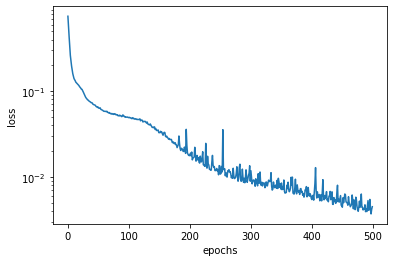

In [ ]:
plt.semilogy(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

c:\users\zakir\appdata\local\programs\python\python36\lib\site-packages\keras\engine\training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


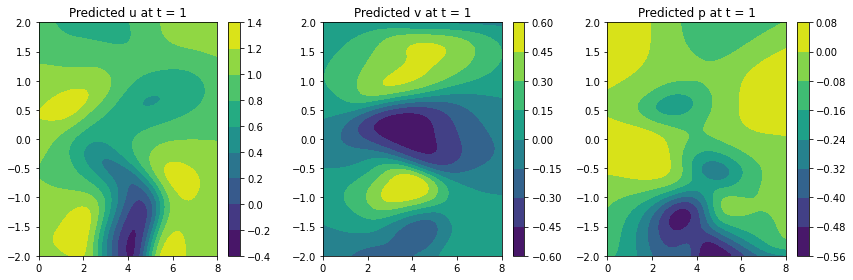

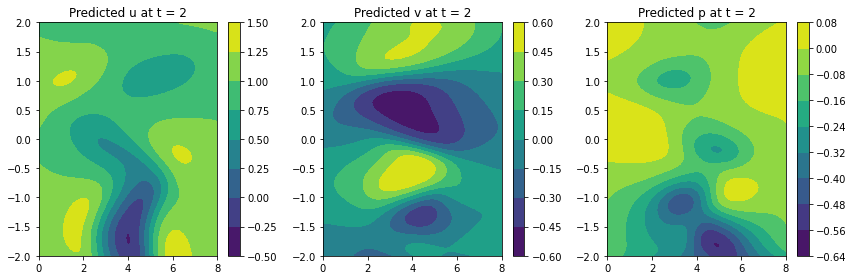

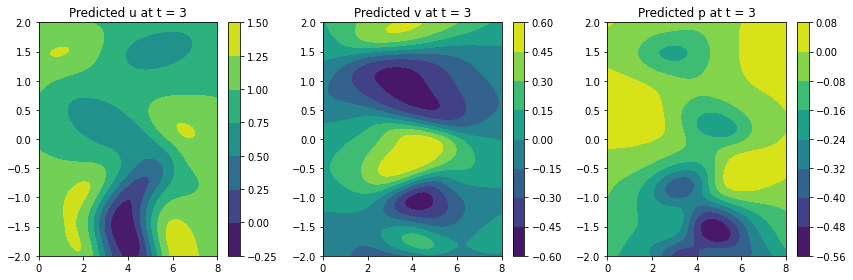

In [ ]:
# Assuming you have imported the required libraries and have a trained model

# Step 2: Prepare input data for prediction
# Define spatial coordinates and time steps for prediction
x_pred = np.linspace(0, 8, 100)
y_pred = np.linspace(-2, 2, 100)
t_pred = np.array([1, 2, 3])  # List of time steps you want to predict

# Create a meshgrid for prediction
X_pred, Y_pred, T_pred = np.meshgrid(x_pred, y_pred, t_pred, indexing='ij')

# Flatten the meshgrid for input data
input_data_pred = [X_pred.flatten(), Y_pred.flatten(), T_pred.flatten()]

# Step 3: Use the trained model to make predictions
# Assuming you have a 'model' object trained using your PINN framework
predictions = model.predict(input_data_pred)  # Remove lambda1 and lambda2

# Extract predicted u, v, and p values
u_pred = predictions[0].reshape(X_pred.shape)
v_pred = predictions[1].reshape(X_pred.shape)
p_pred = predictions[2].reshape(X_pred.shape)

# Step 4: Visualize the predicted results
for i, t in enumerate(t_pred):
    # Create plots or visualizations for u_pred, v_pred, and p_pred at time t
    # You can use Matplotlib or any other plotting library
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.contourf(x_pred, y_pred, u_pred[:, :, i])
    plt.colorbar()
    plt.title(f'Predicted u at t = {t}')

    plt.subplot(132)
    plt.contourf(x_pred, y_pred, v_pred[:, :, i])
    plt.colorbar()
    plt.title(f'Predicted v at t = {t}')

    plt.subplot(133)
    plt.contourf(x_pred, y_pred, p_pred[:, :, i])
    plt.colorbar()
    plt.title(f'Predicted p at t = {t}')

    plt.tight_layout()
    plt.show()


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
t (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
concat_2 (Concatenate)          (None, 3)            0           x[0][0]                          
                                                                 y[0][0]                      